# Current Population Survey Dataset Principal Component Analysis

In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# Import dataset
df = pd.read_csv("../datasets/CPS2016_NEW.csv")
df = df.astype({'ismarried': str, 'faminc_50': str, 'marital': str})

# Standardize the Dataset

In [3]:
# Only use numerical variables except for 'fam_income'
# B/C we can't use the 'fam_income' variable when predicting if family income is < 50,000
features = ['age', 'weekly_hrs', 'educ',
            'num_in_house', 'num_child']

# Seperating out the features       
x = df.loc[:, features].values.astype(float)

# Seperating out the target
y = df.loc[:, ['faminc_50']].values

# Standardizing the features            
x = StandardScaler().fit_transform(x)

# Create Covariance Matrix
pca = PCA(n_components=2)

# Calculate Eigenvalues
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 
                           'principal component 2'])

# Create dataframe for plotting
plotDf = pd.concat([principalDf, df[['faminc_50']]], axis = 1)

## Principal Components
Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by explained_variance_.

The principal components are the colums of the matrix `V` (or the rows of the matrix `VT`).  These are the unit vectors in the direction of the singular values.

In [4]:
pca.components_

array([[-0.38459271, -0.0597607 , -0.17772928,  0.67050813,  0.60609262],
       [ 0.24433481,  0.66269523,  0.62037833,  0.06028763,  0.33560641]])

## Explained Variance
The explained variance tells us how much information (variance) can be attributed to each of the principal components

In [5]:
# The amount of variance explained by each of the selected components.
pca.explained_variance_

array([1.69965382, 1.17281625])

In [6]:
# Percentage of variance explained by each of the selected components.
pca.explained_variance_ratio_

array([0.33992461, 0.234559  ])

Together, the first two principal components contains 57.5% of the data

In [7]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([34. , 57.5])

## Singular Values
The singular values are the entries in `s`, listed from highest to lowest.  These are equal to the standard deviation of the dataset in the principal directions, after correcting for the `sqrt(N)` average.
In other words, the values of `s**2/N` are the variances.

In [8]:
pca.singular_values_/np.sqrt(len(df))

array([1.30369592, 1.08295661])

## Noise Variance
Equal to the average of (min(n_features, n_samples) - n_components) smallest eigenvalues of the covariance matrix of X.

In [9]:
pca.noise_variance_

0.7092068079393347

# Plotting Reduced-Dimension Data

## Family Income >50000
- magenta: family income is less than 50,000 
- green: family income is greater than or equal to 50,000

We can see the data seperated, but there is overlap

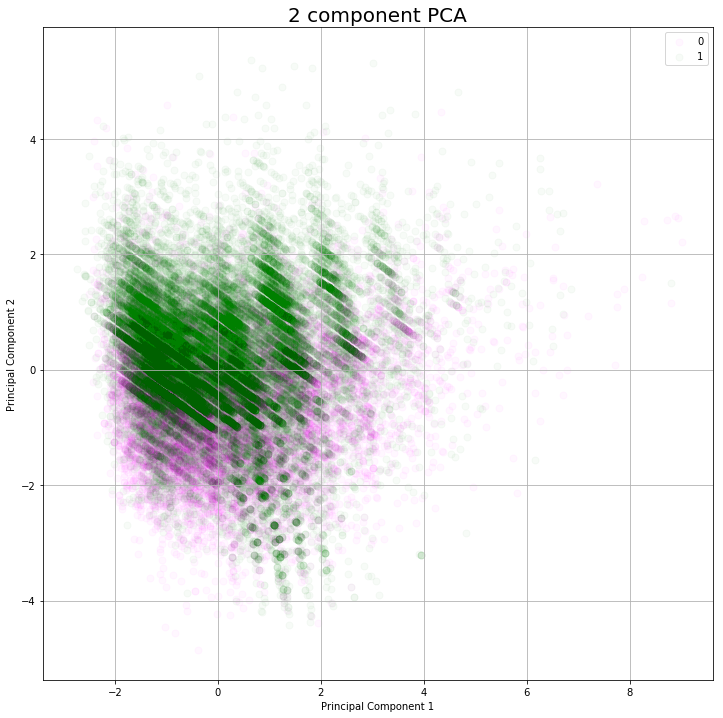

In [10]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA', fontsize = 20)

targets = ['0','1']
colors = ['magenta', 'green']

for target, color in zip(targets,colors):
    indicesToKeep = plotDf['faminc_50'] == target
    ax.scatter(plotDf.loc[indicesToKeep, 'principal component 1']
              , plotDf.loc[indicesToKeep, 'principal component 2']
              , c = color
              , s = 50
              , alpha = .03)
ax.legend(targets)
ax.grid()

# Add fam_income variable to features

In [11]:
# We are adding the 'fam_income' variable back
features = ['age', 'weekly_hrs', 'educ', 
                'fam_income', 'num_in_house', 'num_child']

# Seperating out the features       
x = df.loc[:, features].values.astype(float)

# Standardizing the features            
x = StandardScaler().fit_transform(x)

# Create Covariance Matrix
pca = PCA(n_components=2)

# Calculate Eigenvalues
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 
                           'principal component 2'])

# Create dataframe for plotting
plotDf = pd.concat([principalDf, df[['faminc_50']]], axis = 1)

In [12]:
pca.components_

array([[-0.3933237 , -0.08065719, -0.21378297, -0.06546386,  0.66078881,
         0.593431  ],
       [-0.14411224, -0.39007043, -0.58159476, -0.63223058, -0.15517515,
        -0.25500866]])

In [13]:
# The amount of variance explained by each of the selected components.
pca.explained_variance_

array([1.70150252, 1.46701686])

In [14]:
# Percentage of variance explained by each of the selected components.
pca.explained_variance_ratio_

array([0.28357862, 0.24449838])

Together, the first two principal components contains 52.8% of the data

In [15]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([28.4, 52.8])

## Individual is Married 
- magenta: individual is not married
- green: individual is married

We can see the data seperated, but there is overlap

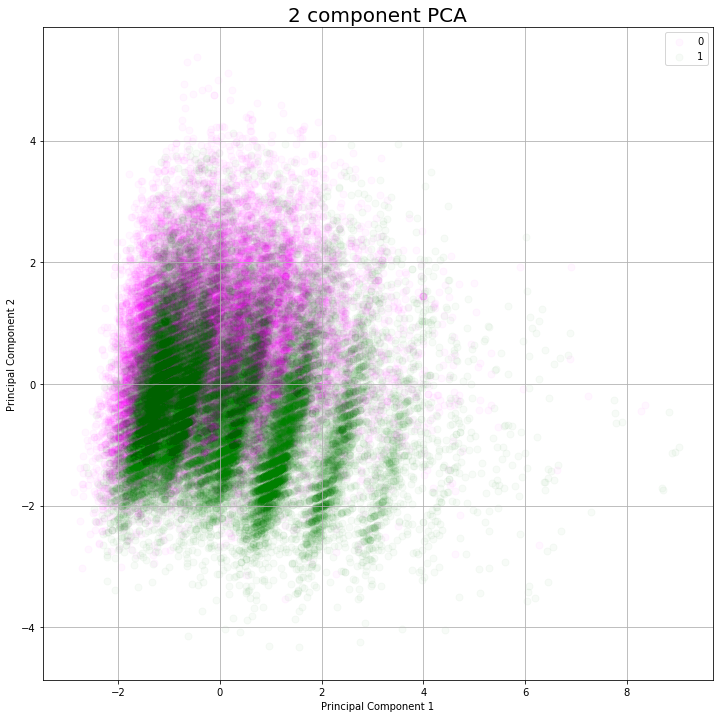

In [16]:
# Seperating out the new target
y = df.loc[:, ['ismarried']].values
# Create dataframe for plotting
plotDf = pd.concat([principalDf, df[['ismarried']]], axis = 1)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA', fontsize = 20)

targets = ['0','1']
colors = ['magenta', 'green']

for target, color in zip(targets,colors):
    indicesToKeep = plotDf['ismarried'] == target
    ax.scatter(plotDf.loc[indicesToKeep, 'principal component 1']
              , plotDf.loc[indicesToKeep, 'principal component 2']
              , c = color
              , s = 50
              , alpha = .03)
ax.legend(targets)
ax.grid()

## Marital Status
- magenta: married, spouse present
- green: married, spouse absent
- blue: widowed
- orange: divorced
- cyan: never married

We can wee that certain categories accumulate more in certain areas, however still overlap

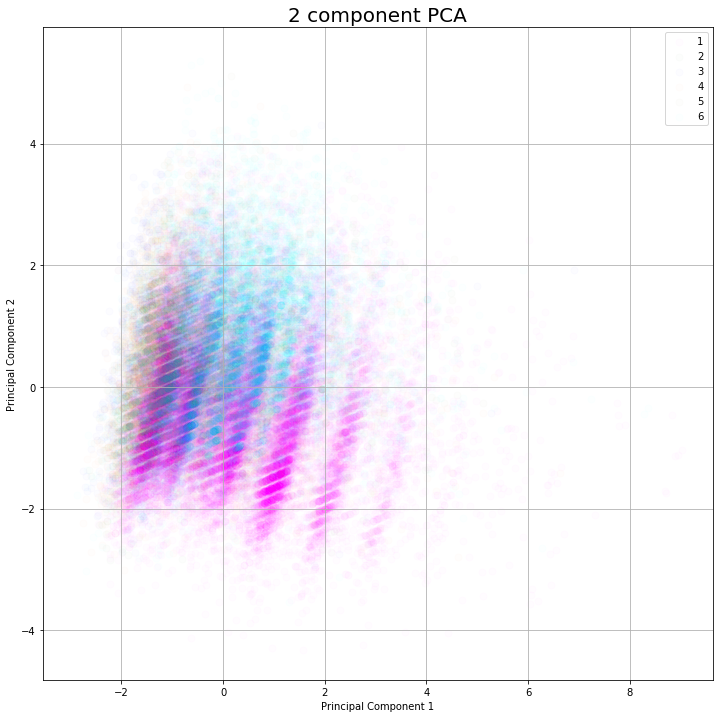

In [17]:
# Seperating out the target
y = df.loc[:, ['marital']].values
# Create dataframe for plotting
plotDf = pd.concat([principalDf, df[['marital']]], axis = 1)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA', fontsize = 20)

targets = ['1','2','3','4','5','6']
colors = ['magenta', 'green','blue','orange','olive','cyan']

for target, color in zip(targets,colors):
    indicesToKeep = plotDf['marital'] == target
    ax.scatter(plotDf.loc[indicesToKeep, 'principal component 1']
              , plotDf.loc[indicesToKeep, 'principal component 2']
              , c = color
              , s = 50
              , alpha = .01)
ax.legend(targets)
ax.grid()